# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#建立模型

In [9]:
model = Sequential()
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [10]:
model.add(Dense(units=128,  kernel_initializer='normal', activation='relu'))

In [11]:
model.add(Dense(units=64,  kernel_initializer='normal', activation='relu'))

In [12]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

# 訓練模型

In [13]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [14]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 12s 246us/step - loss: 0.2799 - acc: 0.9184 - val_loss: 0.1172 - val_acc: 0.9646
Epoch 2/10
48000/48000 [==============================] - 11s 219us/step - loss: 0.1059 - acc: 0.9674 - val_loss: 0.0951 - val_acc: 0.9703
Epoch 3/10
48000/48000 [==============================] - 11s 228us/step - loss: 0.0699 - acc: 0.9779 - val_loss: 0.0905 - val_acc: 0.9745
Epoch 4/10
48000/48000 [==============================] - 11s 225us/step - loss: 0.0534 - acc: 0.9830 - val_loss: 0.1015 - val_acc: 0.9720
Epoch 5/10
48000/48000 [==============================] - 11s 228us/step - loss: 0.0427 - acc: 0.9862 - val_loss: 0.0983 - val_acc: 0.9731
Epoch 6/10
48000/48000 [==============================] - 11s 237us/step - loss: 0.0372 - acc: 0.9880 - val_loss: 0.1083 - val_acc: 0.9724
Epoch 7/10
48000/48000 [==============================] - 11s 232us/step - loss: 0.0285 - acc: 0.9905 - val_loss: 0.

# 以圖形顯示訓練過程

In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

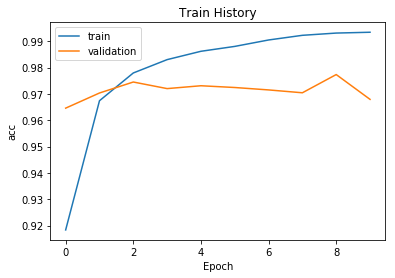

In [16]:
show_train_history(train_history,'acc','val_acc')

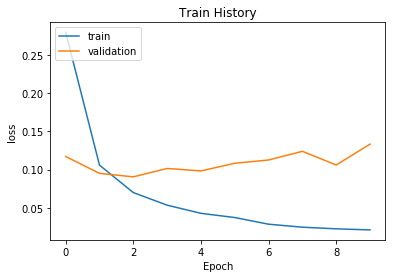

In [17]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [18]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 65us/step

accuracy= 0.9705
